In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
matplotlib.style.use('fivethirtyeight')

In [4]:
gs_all = pd.read_pickle('./data/experiments/grid_search_results.pkl')

gs = gs_all[gs_all['dataset'] == 'val']
gs_pop = gs_all[gs_all['dataset'] == 'val_popular']
gs_unp = gs_all[gs_all['dataset'] == 'val_unpopular']

In [5]:
gs

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall
0,val,skipgram,pagerank,0.0,5,0,0.017787,0.241833,0.027714
1,val,skipgram,pagerank,0.0,5,1,0.018388,0.235461,0.030978
2,val,skipgram,pagerank,0.0,5,5,0.023236,0.222573,0.042232
3,val,skipgram,pagerank,0.0,5,10,0.028110,0.206584,0.052197
4,val,skipgram,pagerank,0.0,5,20,0.035042,0.206912,0.065593
5,val,skipgram,pagerank,0.0,10,0,0.020021,0.241936,0.046855
6,val,skipgram,pagerank,0.0,10,1,0.021151,0.234971,0.053478
7,val,skipgram,pagerank,0.0,10,5,0.027457,0.222006,0.072321
8,val,skipgram,pagerank,0.0,10,10,0.033320,0.206246,0.088726
9,val,skipgram,pagerank,0.0,10,20,0.043315,0.207014,0.124658


In [6]:
gs_random_uniform = pd.read_pickle('./data/experiments/random_uniform_grid_search_results.pkl')
gs_random_weighted = pd.read_pickle('./data/experiments/random_weighted_grid_search_results.pkl')

# Embedding results

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9f9329860>,
      dtype=object)

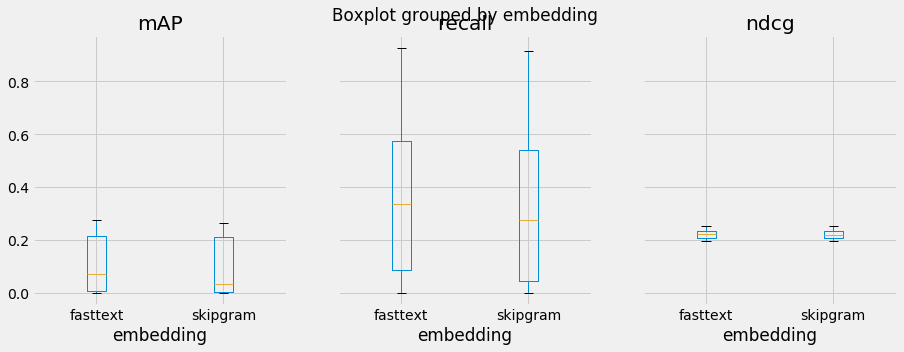

In [79]:
gs.boxplot(['mAP', 'recall', 'ndcg'], 'embedding', figsize=(15,5), layout=(1,3))

# Popularity results

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9f82d5e80>,
      dtype=object)

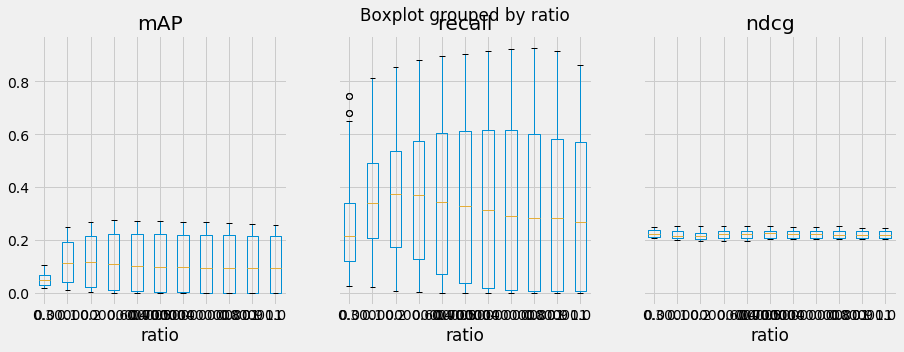

In [80]:
gs.boxplot(['mAP', 'recall', 'ndcg'], 'ratio', figsize=(15,5), layout=(1,3))

# Ratio results

/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


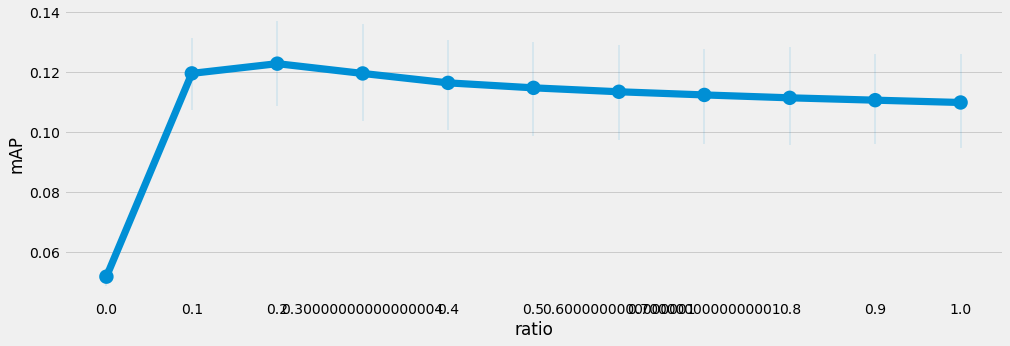

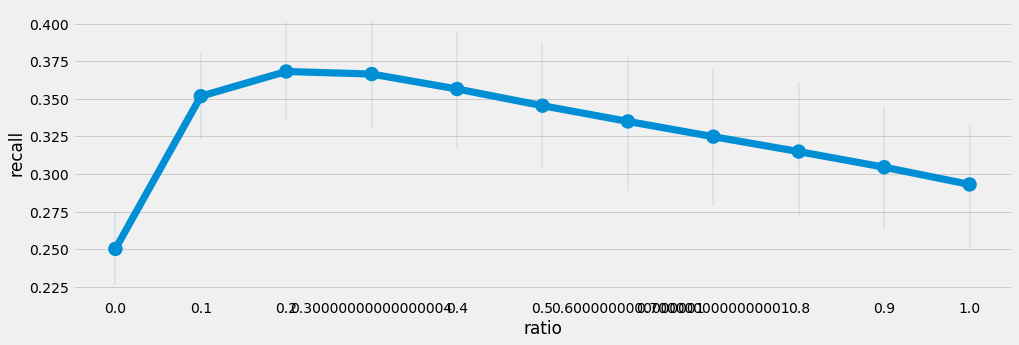

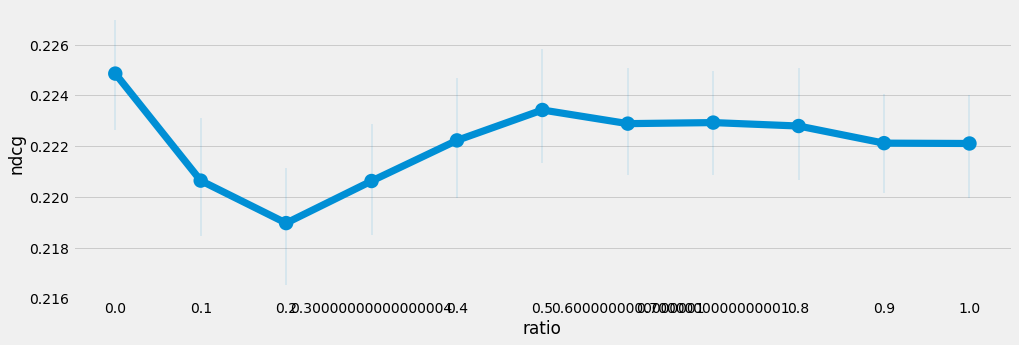

In [81]:
plt.figure(figsize=(15,5))
sns.pointplot(gs['ratio'], gs['mAP'], errwidth=0.2, markers='.')

plt.figure(figsize=(15,5))
sns.pointplot(gs['ratio'], gs['recall'], errwidth=0.2, markers='.')

plt.figure(figsize=(15,5))
sns.pointplot(gs['ratio'], gs['ndcg'], errwidth=0.2, markers='.')

# K results

/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


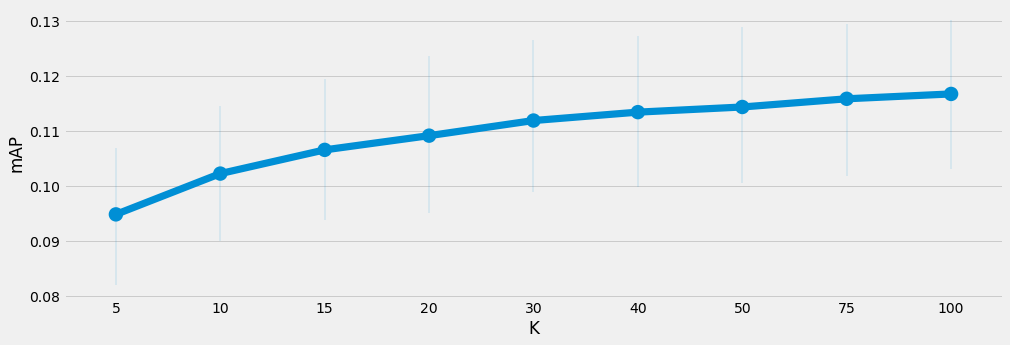

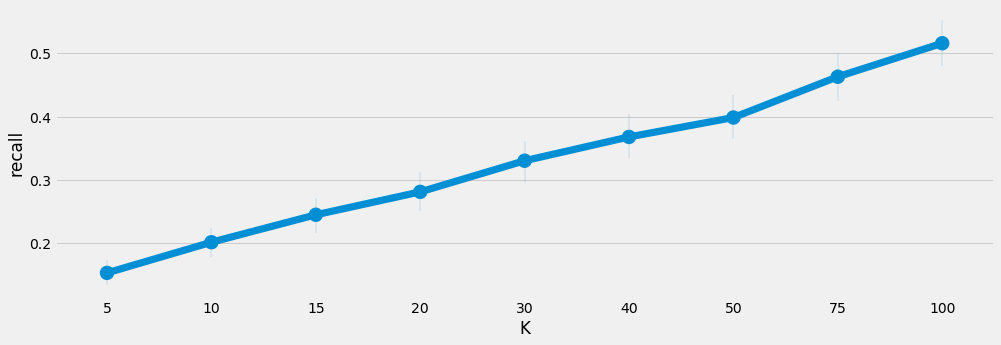

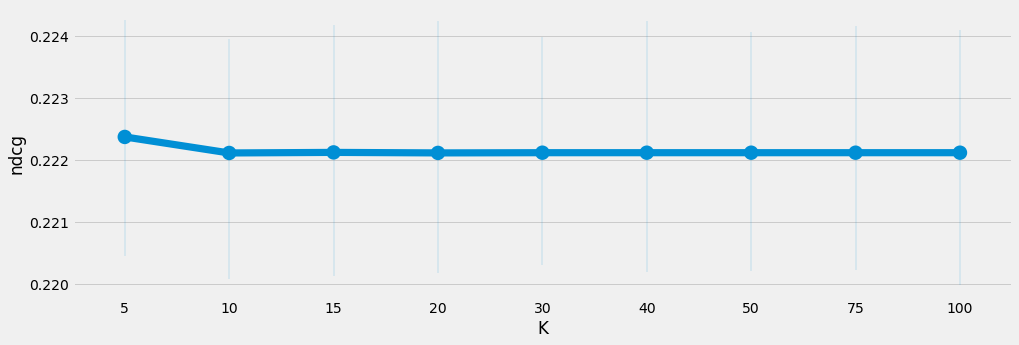

In [82]:
plt.figure(figsize=(15,5))
sns.pointplot(gs['K'], gs['mAP'], errwidth=0.2, markers='.')

plt.figure(figsize=(15,5))
sns.pointplot(gs['K'], gs['recall'], errwidth=0.2, markers='.')

plt.figure(figsize=(15,5))
sns.pointplot(gs['K'], gs['ndcg'], errwidth=0.2, markers='.')

# Hashtag occurence limit results

/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


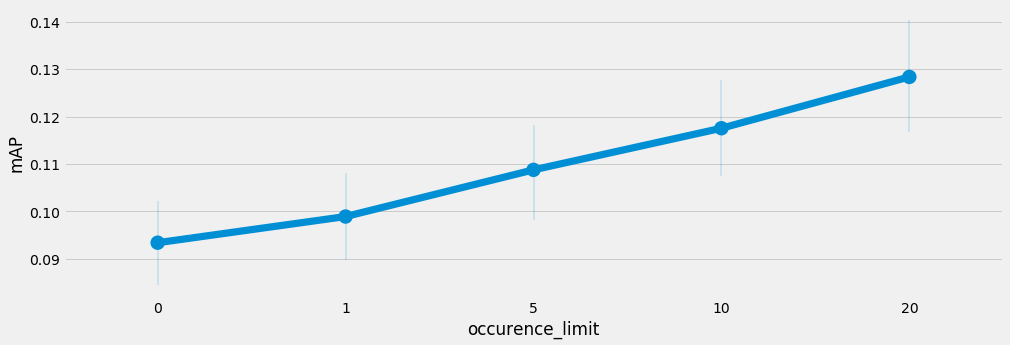

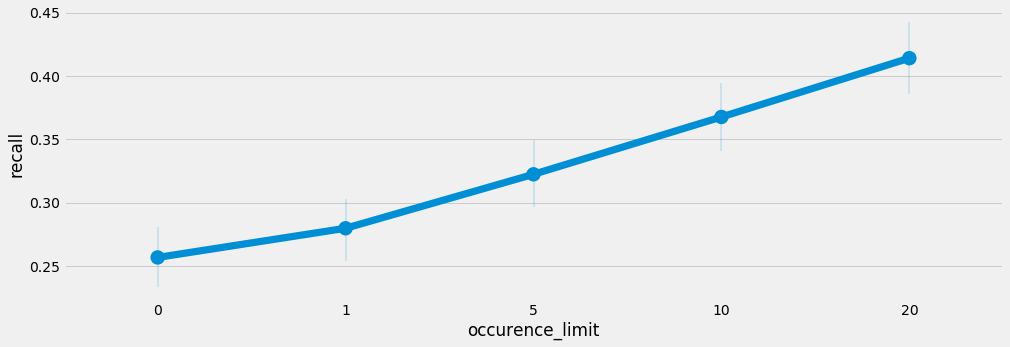

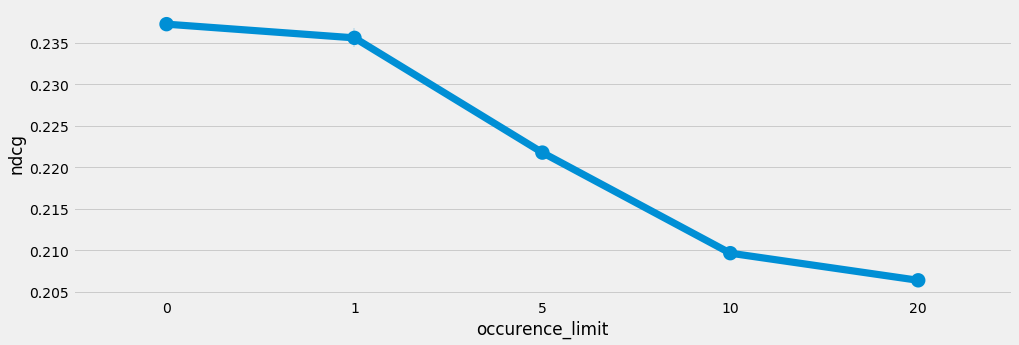

In [85]:
plt.figure(figsize=(15,5))
sns.pointplot(gs['occurence_limit'], gs['mAP'], errwidth=0.3, markers='.')

plt.figure(figsize=(15,5))
sns.pointplot(gs['occurence_limit'], gs['recall'], errwidth=0.3, markers='.')

plt.figure(figsize=(15,5))
sns.pointplot(gs['occurence_limit'], gs['ndcg'], errwidth=0.3, markers='.')

# Popular vs unpopular

/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


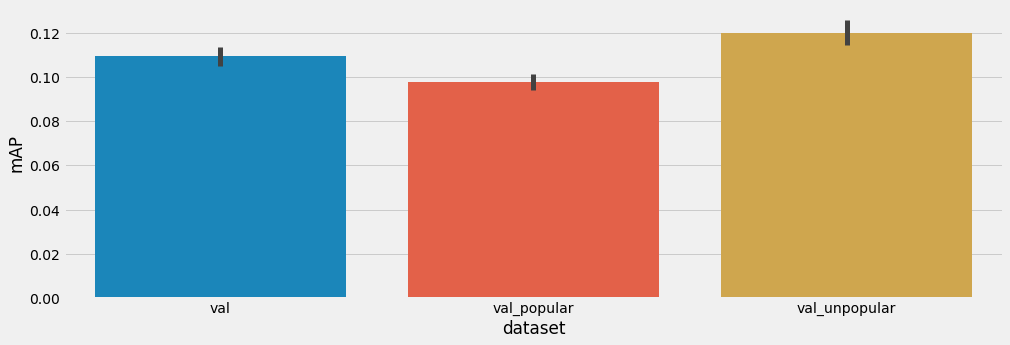

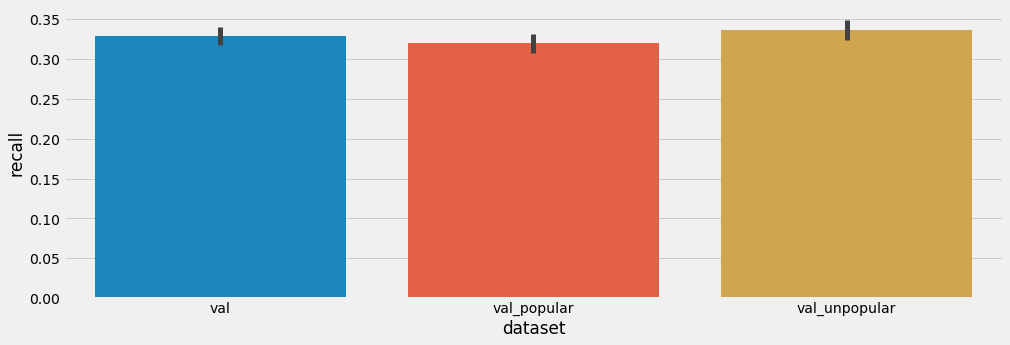

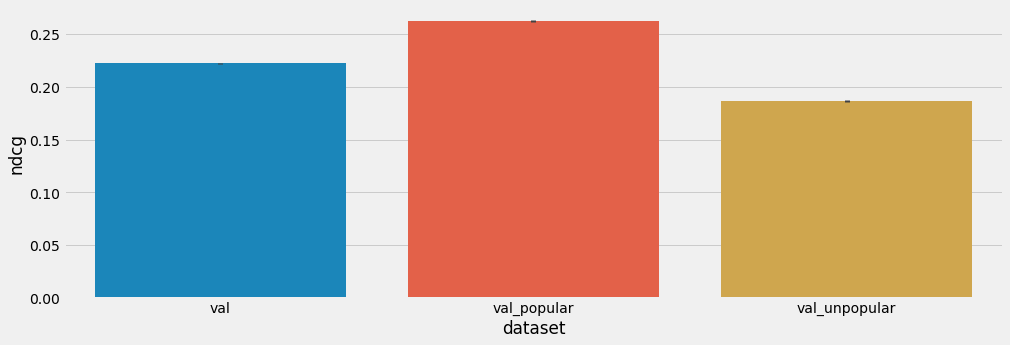

In [115]:
plt.figure(figsize=(15,5))
sns.barplot(gs_all['dataset'], gs_all['mAP'], errwidth=5)

plt.figure(figsize=(15,5))
sns.barplot(gs_all['dataset'], gs_all['recall'], errwidth=5)

plt.figure(figsize=(15,5))
sns.barplot(gs_all['dataset'], gs_all['ndcg'], errwidth=5)

/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


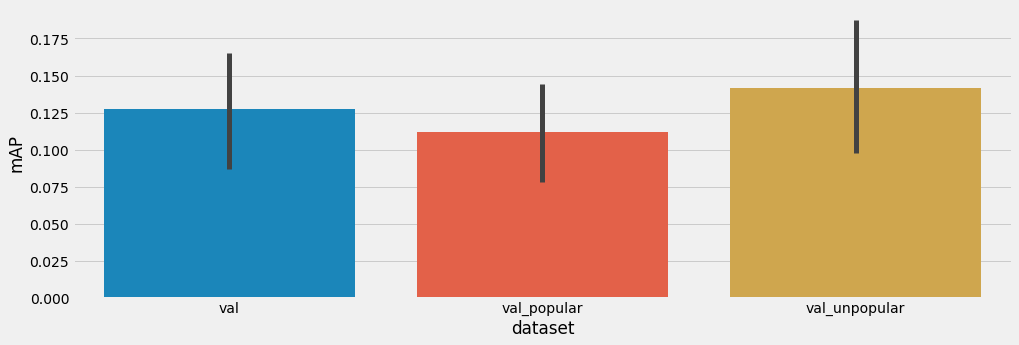

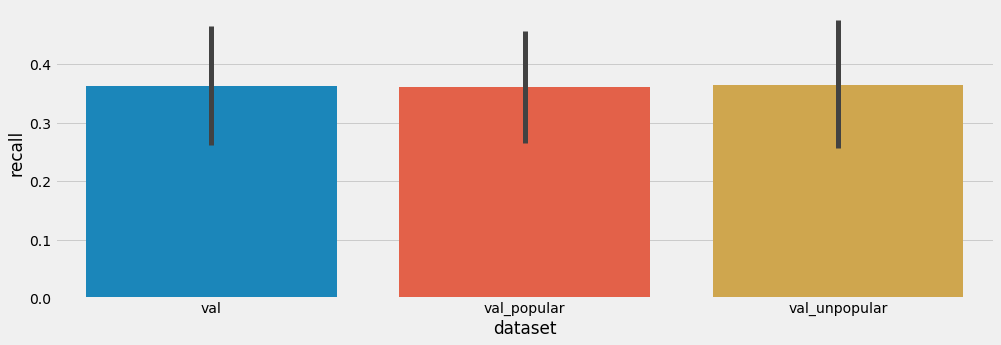

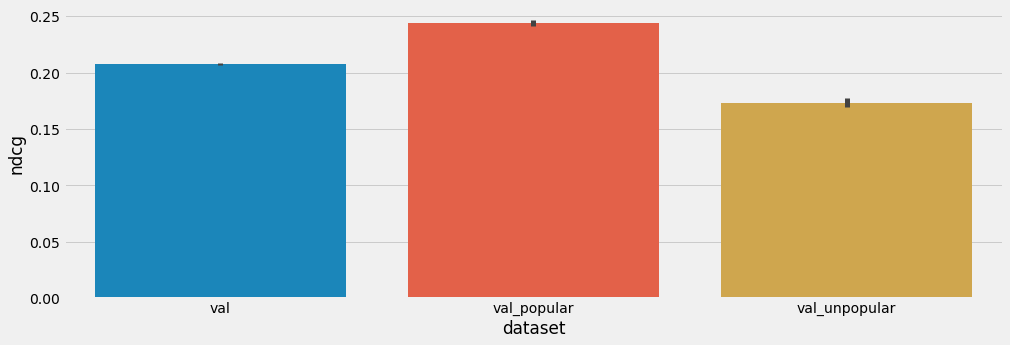

In [17]:
plt.figure(figsize=(15,5))
d = gs_all[(gs_all['occurence_limit']==20) & (gs_all['ratio'] >0.9)]
#d = d[d['K']<=10]
sns.barplot(d['dataset'], d['mAP'], errwidth=5)

plt.figure(figsize=(15,5))
sns.barplot(d['dataset'], d['recall'], errwidth=5)

plt.figure(figsize=(15,5))
sns.barplot(d['dataset'], d['ndcg'], errwidth=5)

In [132]:
d = gs.copy()
d =d[d['K'] <20]

In [133]:
d['avg'] = (d.mAP + d.recall + d.ndcg) /3

In [134]:
d[d['avg'] == d['avg'].max()]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall,avg
1184,val,fasttext,pagerank,0.4,15,20,0.257592,0.200656,0.598698,0.352315


In [137]:
l = gs_pop.copy()
l[(l['embedding'] == 'fasttext') &
  (l['popularity'] == 'pagerank') &
  (l['ratio'] == 0.4) &
  (l['K'] == 15) &
  (l['occurence_limit'] == 20)]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall
3164,val_popular,fasttext,pagerank,0.4,15,20,0.21933,0.245231,0.533505


In [138]:
l = gs_unp.copy()
l[(l['embedding'] == 'fasttext') &
  (l['popularity'] == 'pagerank') &
  (l['ratio'] == 0.4) &
  (l['K'] == 15) &
  (l['occurence_limit'] == 20)]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall
5144,val_unpopular,fasttext,pagerank,0.4,15,20,0.29307,0.159324,0.659147


In [139]:
d[d['mAP'] == d['mAP'].max()]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall,avg
1139,val,fasttext,pagerank,0.3,15,20,0.261354,0.200157,0.583553,0.348355


In [140]:
d[d['recall'] == d['recall'].max()]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall,avg
1184,val,fasttext,pagerank,0.4,15,20,0.257592,0.200656,0.598698,0.352315


In [143]:
d[d['ndcg'] == d['ndcg'].max()]

,dataset,embedding,popularity,ratio,K,occurence_limit,mAP,ndcg,recall,avg
641,val,skipgram,mean_retweets,0.3,15,1,0.002913,0.252891,0.017888,0.091231


In [185]:
h = gs_all.groupby(['dataset', 'ratio']).agg('mean').reset_index()
h
#h = h.pivot_table(['mAP','recall','ndcg'],index=['ratio','dataset']).reset_index()
h = h.pivot_table(['mAP','recall','ndcg'],index=['ratio'], columns=['dataset']).reset_index()
h

ratio       mAP                                ndcg              \
dataset             val val_popular val_unpopular       val val_popular   
0         0.0  0.051846    0.058220      0.046137  0.224854    0.261193   
1         0.1  0.119609    0.111827      0.126701  0.220638    0.260067   
2         0.2  0.122854    0.110276      0.134256  0.218964    0.260883   
3         0.3  0.119591    0.105616      0.132240  0.220622    0.261881   
4         0.4  0.116452    0.102087      0.129443  0.222222    0.263045   
5         0.5  0.114792    0.100548      0.127670  0.223421    0.263695   
6         0.6  0.113483    0.099212      0.126383  0.222883    0.262857   
7         0.7  0.112429    0.098171      0.125316  0.222924    0.262690   
8         0.8  0.111464    0.097222      0.124334  0.222789    0.261994   
9         0.9  0.110682    0.096416      0.123574  0.222114    0.260792   
10        1.0  0.109909    0.095714      0.122737  0.222101    0.260736   

                         recall                            
dataset val_unpopular       val val_popular val_unpopular  
0            0.192102  0.250272    0.251855      0.249008  
1            0.185093  0.351700    0.337653      0.364515  
2            0.181174  0.368117    0.354459      0.380535  
3            0.183423  0.366424    0.354526      0.377215  
4            0.185424  0.356489    0.346451      0.365573  
5            0.187114  0.345407    0.336525      0.353424  
6            0.186845  0.334953    0.327198      0.341927  
7            0.187075  0.324811    0.317557      0.331322  
8            0.187446  0.314916    0.307716      0.321370  
9            0.187245  0.304542    0.296812      0.311473  
10           0.187270  0.293085    0.285800      0.299622

In [186]:
tst = h[h['ratio']>0]

(h['mAP']['val_popular'] > h['mAP']['val_unpopular']).any(), (tst['mAP']['val_popular'] > tst['mAP']['val_unpopular']).any()

False

In [187]:
(h['recall']['val_popular'] > h['recall']['val_unpopular']).any(), (tst['recall']['val_popular'] > tst['recall']['val_unpopular']).any()

(True, False)

In [188]:
(h['ndcg']['val_popular'] > h['ndcg']['val_unpopular']).any(), (tst['ndcg']['val_popular'] > tst['ndcg']['val_unpopular']).any()

(True, True)

# Random results

In [7]:
ru = gs_random_uniform.copy()
ru['method'] = 'Random uniform'

rw = gs_random_weighted.copy()
rw['method'] = 'Random weighted'

rand = pd.concat([ru, rw])

our = gs.copy()
our['method'] = 'Our'

our_vs_rand = pd.concat([rand,our])

/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


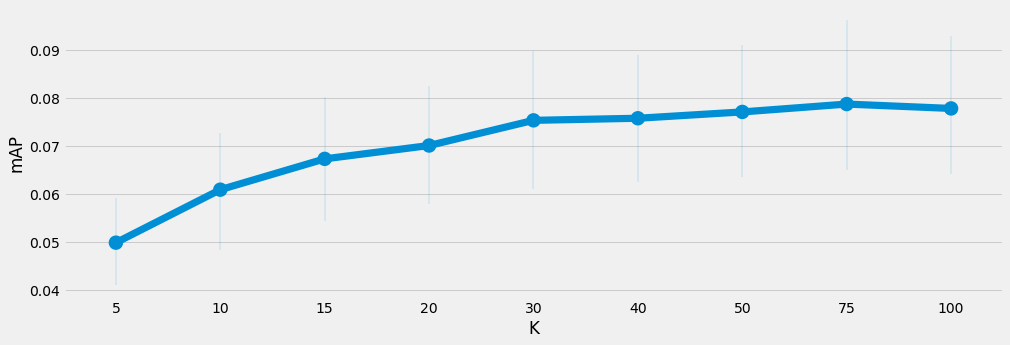

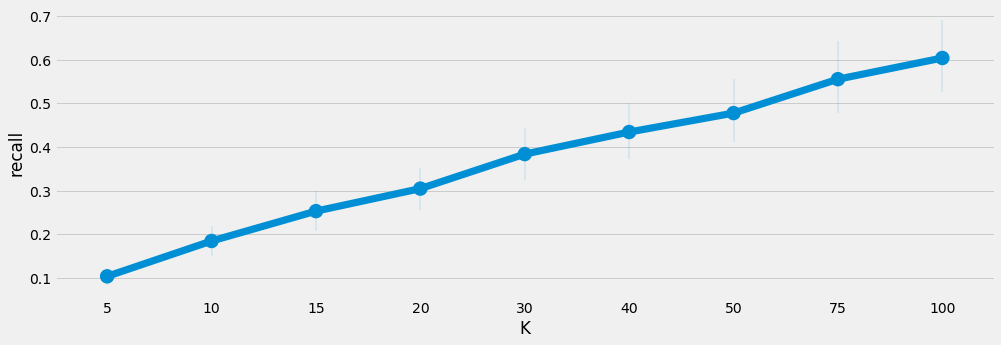

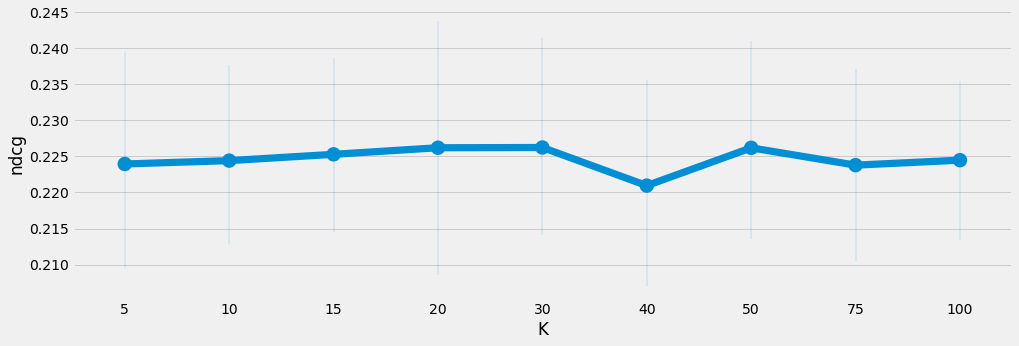

In [8]:
plt.figure(figsize=(15,5))
sns.pointplot(rw['K'], rw['mAP'], errwidth=0.2, markers='.')

plt.figure(figsize=(15,5))
sns.pointplot(rw['K'], rw['recall'], errwidth=0.2, markers='.')

plt.figure(figsize=(15,5))
sns.pointplot(rw['K'], rw['ndcg'], errwidth=0.2, markers='.')

/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


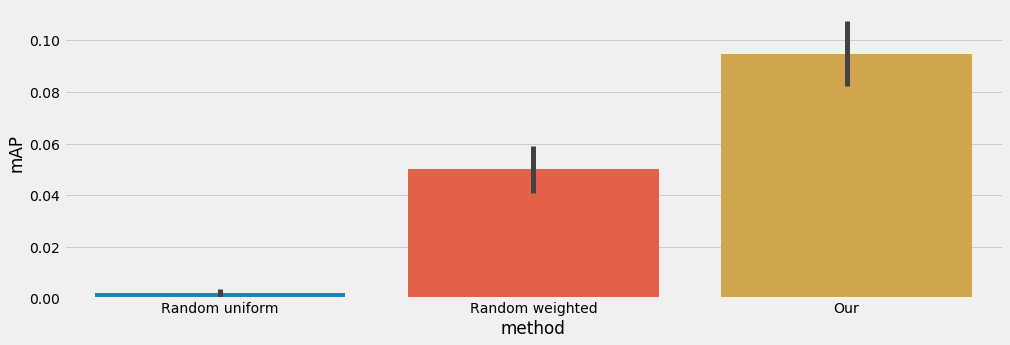

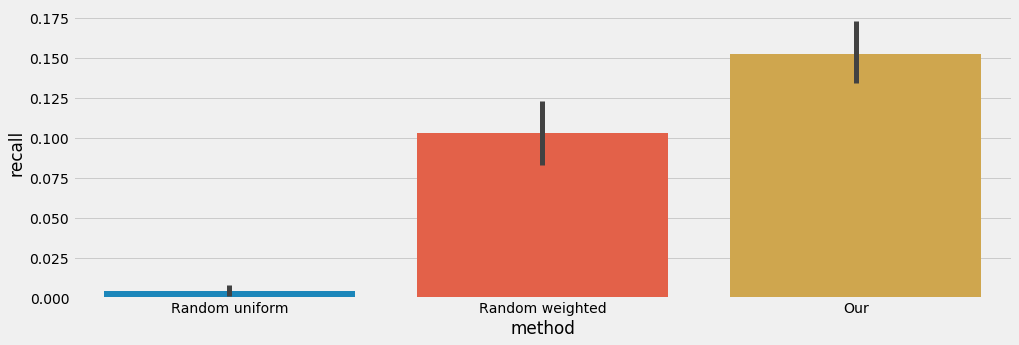

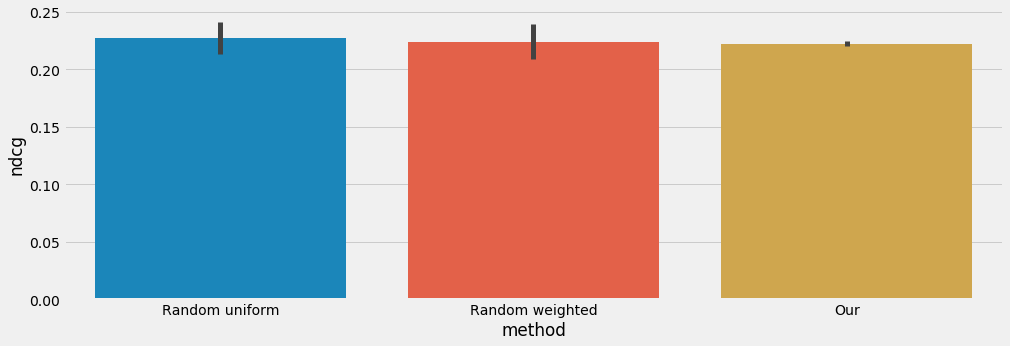

In [9]:
plt.figure(figsize=(15,5))
#d = gs_random_uniform[(gs_random_uniform['occurence_limit']==20) & (gs_all['ratio'] >0.9)]
d = our_vs_rand.copy()
d = d[d.K ==5]
sns.barplot(d['method'], d['mAP'], errwidth=5)

plt.figure(figsize=(15,5))
sns.barplot(d['method'], d['recall'], errwidth=5)

plt.figure(figsize=(15,5))
sns.barplot(d['method'], d['ndcg'], errwidth=5)

/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


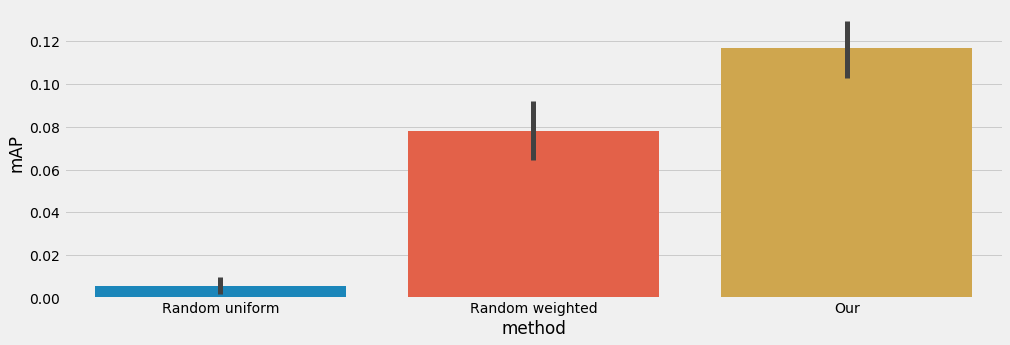

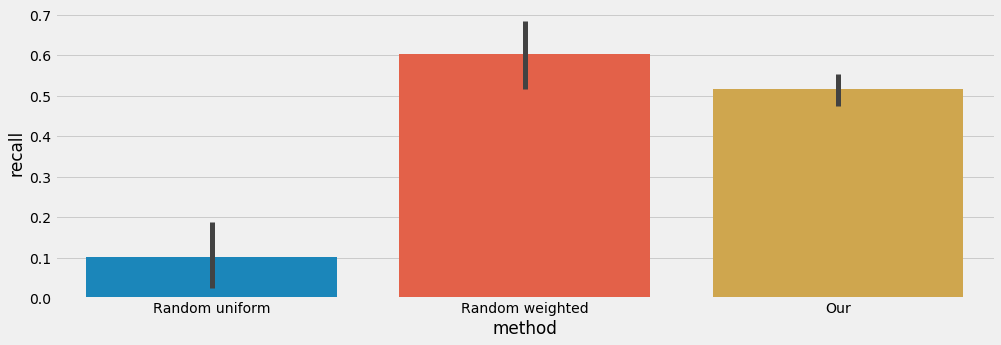

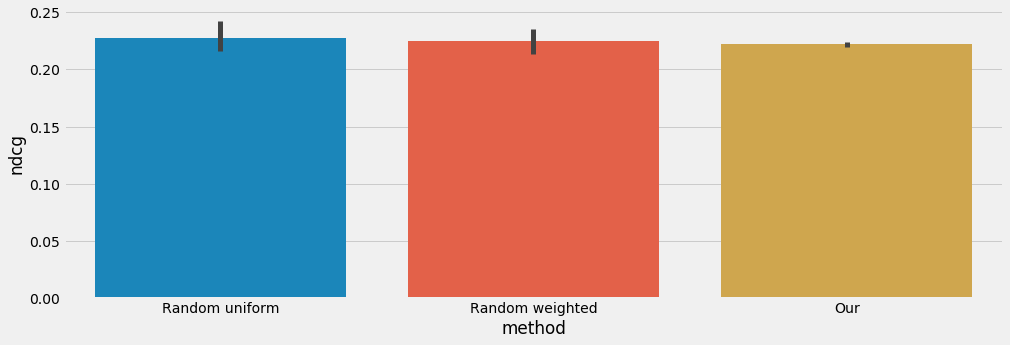

In [11]:
plt.figure(figsize=(15,5))
#d = gs_random_uniform[(gs_random_uniform['occurence_limit']==20) & (gs_all['ratio'] >0.9)]
d = our_vs_rand.copy()
d = d[d.K==100]
sns.barplot(d['method'], d['mAP'], errwidth=5)

plt.figure(figsize=(15,5))
sns.barplot(d['method'], d['recall'], errwidth=5)

plt.figure(figsize=(15,5))
sns.barplot(d['method'], d['ndcg'], errwidth=5)

/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Recall with top 5 recommendations\nOur vs. baseline')

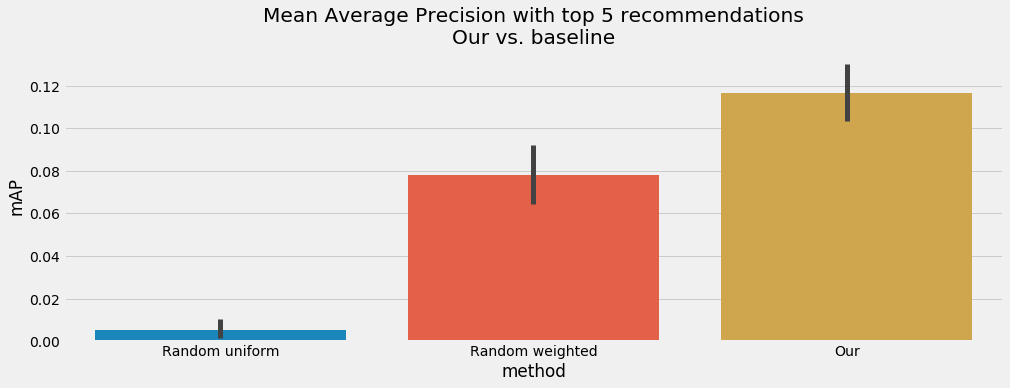

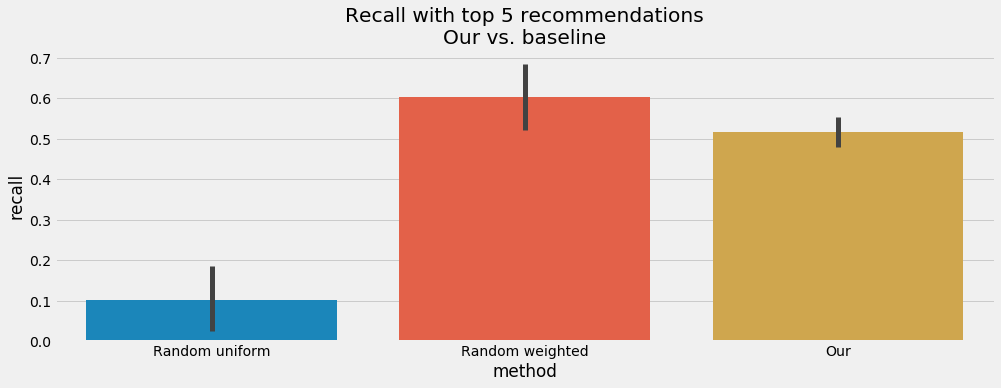

In [34]:
plt.figure(figsize=(15,5))
#d = gs_random_uniform[(gs_random_uniform['occurence_limit']==20) & (gs_all['ratio'] >0.9)]
d = our_vs_rand.copy()
d = d[d['K']==100]
sns.barplot(d['method'], d['mAP'], errwidth=5)
plt.title('Mean Average Precision with top 5 recommendations\nOur vs. baseline')

plt.figure(figsize=(15,5))
sns.barplot(d['method'], d['recall'], errwidth=5)
plt.title('Recall with top 5 recommendations\nOur vs. baseline')


# plt.figure(figsize=(15,5))
# sns.barplot(d['method'], d['ndcg'], errwidth=5)

/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


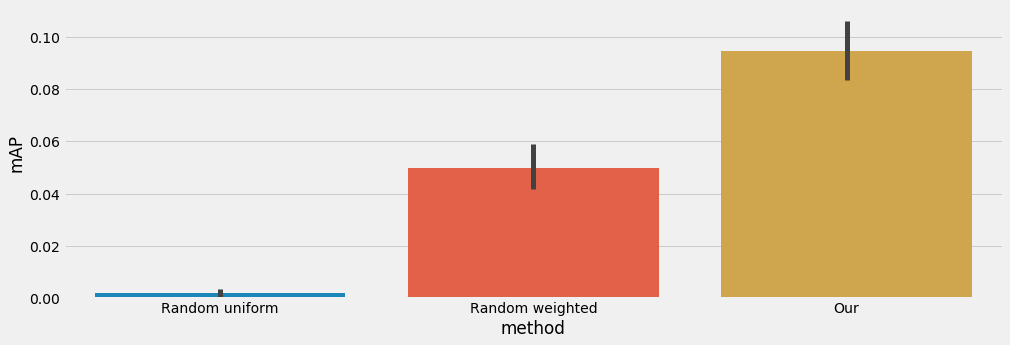

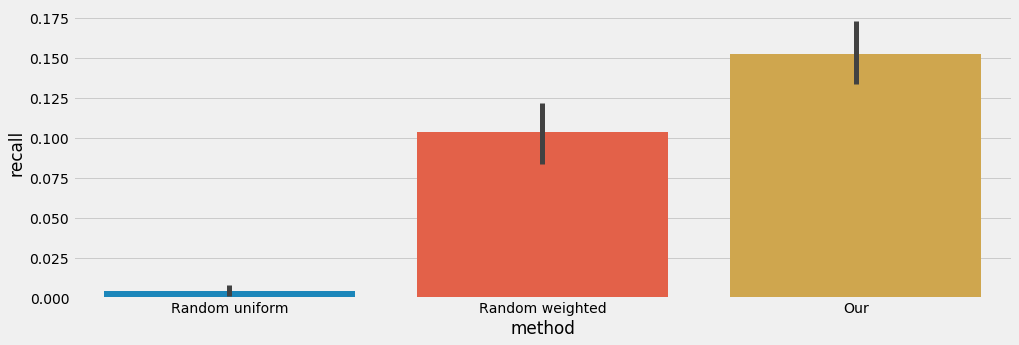

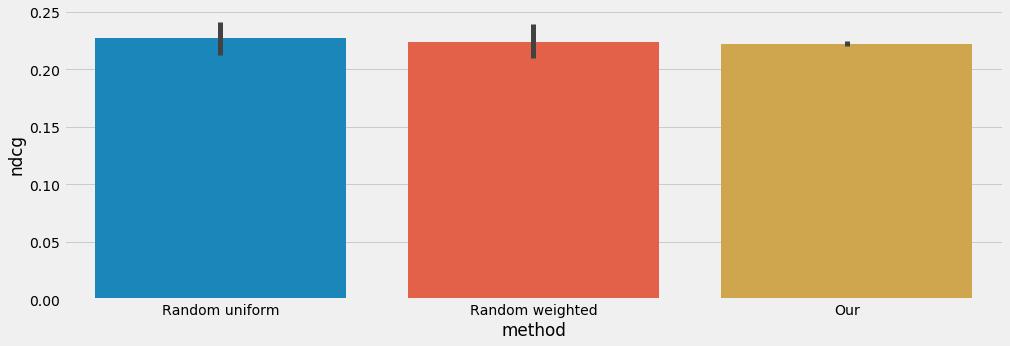

In [25]:
plt.figure(figsize=(15,5))
#d = gs_random_uniform[(gs_random_uniform['occurence_limit']==20) & (gs_all['ratio'] >0.9)]
d = our_vs_rand.copy()
d = d[d['K']==5]
sns.barplot(d['method'], d['mAP'], errwidth=5)

plt.figure(figsize=(15,5))
sns.barplot(d['method'], d['recall'], errwidth=5)

plt.figure(figsize=(15,5))
sns.barplot(d['method'], d['ndcg'], errwidth=5)

/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


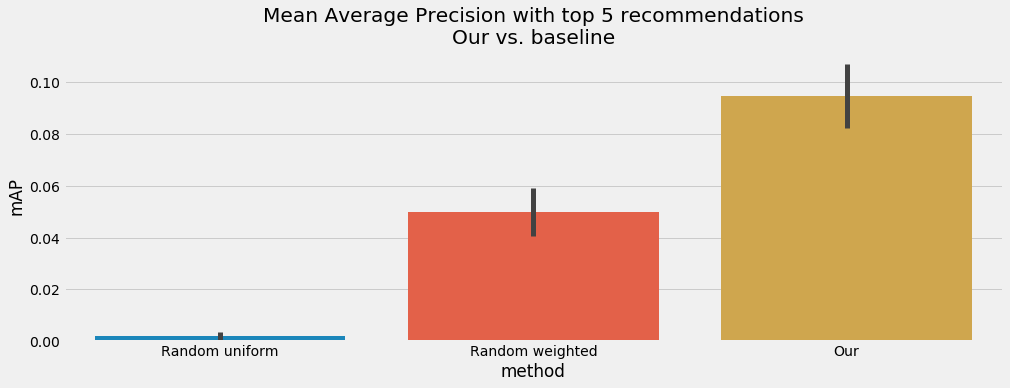

In [32]:
plt.figure(figsize=(15,5))
#d = gs_random_uniform[(gs_random_uniform['occurence_limit']==20) & (gs_all['ratio'] >0.9)]
d = our_vs_rand.copy()
d = d[d['K']==5]

sns.barplot(d['method'], d['mAP'], errwidth=5)
plt.title('Mean Average Precision with top 5 recommendations\nOur vs. baseline')

plt.savefig('map_top5.svg')

In [33]:
d.groupby('method').agg({'mAP': 'mean', 'recall': 'mean'})

,mAP,recall
method,,
Our,0.094757,0.152658
Random uniform,0.001975,0.004628
Random weighted,0.049943,0.103602


/home/mkosturek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


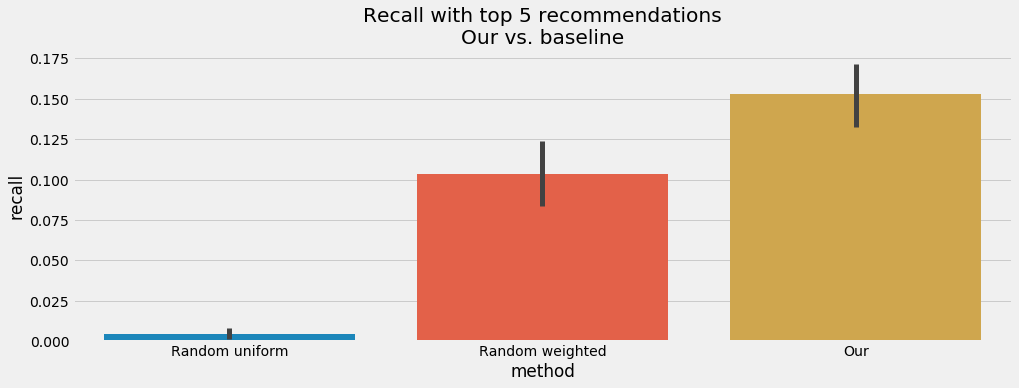

In [31]:
d = our_vs_rand.copy()
d = d[d['K']==5]

plt.figure(figsize=(15,5))
sns.barplot(d['method'], d['recall'], errwidth=5)
plt.title('Recall with top 5 recommendations\nOur vs. baseline')
plt.savefig('recall_top5.svg')

In [ ]:
has